# Pxy and xy Diagrams for Binary Mixtures


## Introduction

For a binary mixture at a fixed temperature, the pressure/composition (Px) diagram plots the equilibrium composition of the liquid and vapor as a function of pressure.  


## Analysis

First, we give the values to $x_A$ : ($0<x_A<1$)

The basic calculations start with Modified Raoult's law

$$P = x_A P_A^{sat}(T) \gamma_A + x_B P_B^{sat}(T) \gamma_B$$

substituting $x_B = 1-x_A$

$$P = x_A P_A^{sat}(T) \gamma_A + (1-x_A) P_B^{sat}(T) \gamma_B$$

then solving for $x_A$ and $y_A$

$$y_A = x_A\frac{P_A^{sat}(T) \gamma_A}{P}$$

## Plotting the Pxy Diagram


In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


The calculations in this notebook are for a representative system of two components, methyl ethyl ketone and toluene. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

Modified Rault's law: 

$$\boxed{y_i P = x_i \gamma_i {P_i}^{sat}}$$

Margules Equations:

$$ln \gamma_A = x_B^2 \bigg[ \Lambda_{AB}+2 (\Lambda_{BA}-\Lambda_{AB})x_A \bigg]$$
$$ln \gamma_B = x_A^2 \bigg[ \Lambda_{BA}+2 (\Lambda_{AB}-\Lambda_{BA})x_B \bigg]$$

For methyl ethyl ketone/toluene system: $$\Lambda_{AB}=0.372 \ \ \Lambda_{BA}=0.198$$

In [16]:
# Antoine's equations
A = 'methyl ethyl ketone'
B = 'toluene'

global PsatA
global PsatB

PsatA= 36.09
PsatB= 12.3



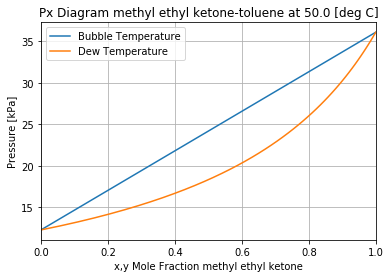

In [17]:
global T
T = 50 

xA = np.linspace(0,1)

def P(x):
    return PsatB+(PsatA-PsatB)*x

def y(x):
    return (x*PsatA)/P(x)


plt.plot(xA, P(xA),y(xA),P(xA))
plt.title('Px Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## Modified Rault's Law 

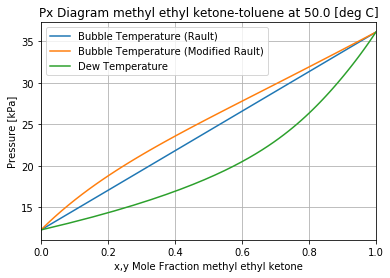

In [29]:
def gammaA(x):
    lamb12=0.372
    lamb21=0.198
    return np.exp((1-x)**2*(lamb12+2*(lamb21-lamb12)*x))

def gammaB(x):
    lamb12=0.372
    lamb21=0.198
    return np.exp(x**2*(lamb21+2*(lamb12-lamb21)*(1-x)))
                  
def P_real(x):
    return PsatB*gammaB(x)+(PsatA*gammaA(x)-PsatB*gammaB(x))*x

def y_real(x):
    return (x*PsatA*gammaA(x))/P(x)


plt.plot(xA, P(xA), xA, P_real(xA),y_real(xA),P_real(xA))
plt.title('Px Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature (Rault)','Bubble Temperature (Modified Rault)','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## Lever Rule

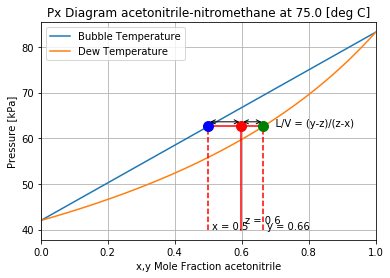

In [46]:
plt.plot(xA, P(xA),y(xA),P(xA))
plt.title('Px Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

xe = np.mean(xA)
ye = y(xe)
Pe = P(xe)
ze = 0.4*xe + 0.6*ye

ax = plt.axis()
plt.plot([ze,ze],[ax[2],Pe],'r')
plt.plot([xe,ye],[Pe,Pe],'r')
plt.plot([xe,xe],[ax[2],Pe],'r--',[ye,ye],[ax[2],Pe],'r--')

plt.text(xe+0.01,ax[2]+0.2,'x = {:.2}'.format(xe))
plt.text(ye+0.01,ax[2]+0.2,'y = {:.2}'.format(ye))
plt.text(ze+0.01,ax[2]+1.5,'z = {:.2}'.format(ze))

plt.annotate('', (xe,Pe+1), (ze,Pe+1), arrowprops={'arrowstyle':'<->'})
plt.annotate('', (ze,Pe+1), (ye,Pe+1), arrowprops={'arrowstyle':'<->'})

plt.annotate('    L/V = (y-z)/(z-x)',(ye,Pe))

plt.plot(xe,Pe,'bo',ms = 10)
plt.plot(ye,Pe,'go',ms = 10)
plt.plot(ze,Pe,'ro',ms = 10)
